In [1]:
import pandas as pd

# dataset
stopword_path = "configs/vietnamese-stopwords-dash.txt"
data_raw = "datasets/raw/data.csv"
data = pd.read_csv(data_raw)

data.columns

Index(['text', 'category'], dtype='object')

In [2]:
data.head(5)

,text,category
0,SHB ghi nhận lợi nhuận trước thuế tăng 94% tro...,stock_market
1,"PDR: Phát Đạt dự kiến lãi 605 tỷ đồng quý III,...",stock_market
2,"""Bong bóng du lịch"" Singapore - Hồng Kông lại ...",international_news
3,"""Bãi rác ở Mỹ ngập vaccine"": Thừa mứa hàng tri...",international_news
4,"""Bí quyết"" dập dịch 1 tháng của Trung Quốc có ...",international_news


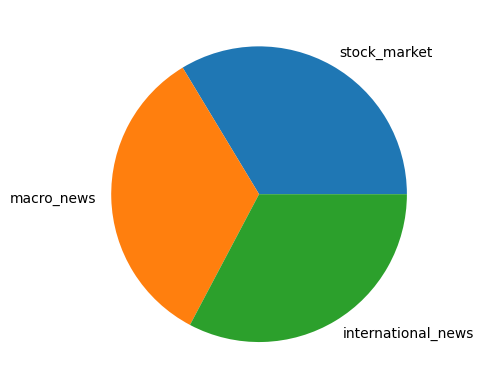

In [17]:
cnt = data.category.value_counts().rename("")
fig = cnt.plot(kind = 'pie', xlabel = "")
fig.get_figure().savefig('outputs/figures/check_balance_labels.png')

# Preprocessing data

## Xóa HTML code (nếu có)

In [7]:
import re
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

test_case = "<title> KQ <title>"
remove_html(test_case)

' KQ '

## Chuẩn hóa Unicode tiếng Việt
Có 2 loại mã Unicode được sử dụng phổ biến, Unicode tổ hợp và Unicode dựng sẵn. Đưa về 1 chuẩn Unicode dựng sẵn
> Nếu bạn không xử lý vấn đề này, khi đưa vào mô hình học máy tính sẽ hiểu đó là các từ khác nhau mặc dù ta đang nhìn thấy chúng chẳng khác nhau gì.

In [10]:
import regex as re

class StandardUnicode:
    
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
    
    def __init__(self):
        pass
    
    def loaddicchar():
        dic = {}
        char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
            '|')
        charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
            '|')
        for i in range(len(char1252)):
            dic[char1252[i]] = charutf8[i]
        return dic
 
    def covert_unicode(txt):
        dicchar = StandardUnicode.loaddicchar()
        return re.sub(
            r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
            lambda x: dicchar[x.group()], txt)

In [13]:
test_case = "hiếu"
StandardUnicode.covert_unicode(test_case)

'hiếu'

## Xoá ký tự đặc biệt
đưa về lower case + xoá ký tự đặc biệt + xoá nhiều space

In [32]:
from gensim.utils import simple_preprocess

" ".join(simple_preprocess("  Khổng ?  Tiến . Đạt c ád bád bá bb bb"))

'khổng tiến đạt ád bád bá bb bb'

## Tách từ tiếng Việt
Mục tiêu là gom từ ghép thành 1 từ đơn. Ví dụ: Học sinh --> Học_sinh

In [259]:
from pyvi import ViTokenizer

ViTokenizer.tokenize("học sinh đi học môn sinh học")

'học_sinh đi học môn sinh_học'

In [293]:
ViTokenizer.tokenize("cổ phiếu hủy giao dịch")

'cổ_phiếu_hủy giao_dịch'

In [292]:
res = ViTokenizer.tokenize("cổ phiếu hủy giao dịch")
# set max link
maxlink = 1
func = lambda x: x[::-1].replace("_"," ", x.count("_") - 1)[::-1] if x.count("_") > maxlink else x
" ".join([func(i) for i in res.split()])

'cổ_phiếu hủy giao_dịch'

## Loại bỏ stopwords
- Stopword là các từ xuất hiện nhiều ở tất cả các chuyên mục cần phân loại. Do đó, chúng là các đặc trưng không có tác dùng cho việc phân loại văn bản.
- Các stopword thường là các từ nối (của, là, có, được, những,…) và các từ đặc trưng của dữ liệu (ví dụ như các từ “máy bay, tiếp viên” là các stopword nếu làm bài phân loại đánh giá khách hàng của doanh nghiệp vận tải hàng không.

In [30]:
stopword = set(open("configs/vietnamese-stopwords-dash.txt", "r").read().split("\n"))
 
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

test_case = "Còn gì nữa đâu"
remove_stopwords(test_case)

'Còn'

## final preprocessing

In [3]:
from helper.preprocessing import TextPreprocessing

In [5]:
preprocesor = TextPreprocessing(stopword_path)
data['text'] = data['text'].map(preprocesor.transform)

In [13]:
preprocesor._vie_tokenizer('cổ phiếu hủy giao dịch')

'cổ_phiếu hủy giao_dịch'

## train test split

In [6]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = 0.15, stratify = data['category'], random_state=1)

## label encode

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_train['category'] = label_encoder.fit_transform(data_train['category'])
data_test['category'] = label_encoder.transform(data_test['category'])

In [8]:
import pickle
with open('models/models_v1.0/label_encoder.pkl', 'wb') as output:
    pickle.dump(label_encoder, output)

## dump data

In [14]:
data_train.to_csv('datasets/preprocessed/train.txt', header=None, index=None, sep='|', mode='w')
data_test.to_csv('datasets/preprocessed/test.txt', header=None, index=None, sep='|', mode='w')

# Modeling

In [ ]:
from helper.modeling import MLClassifier, DLClassifier, DataGenerator

## Multinomial Naive Bayes

Test accuracy:  0.8332408435072142


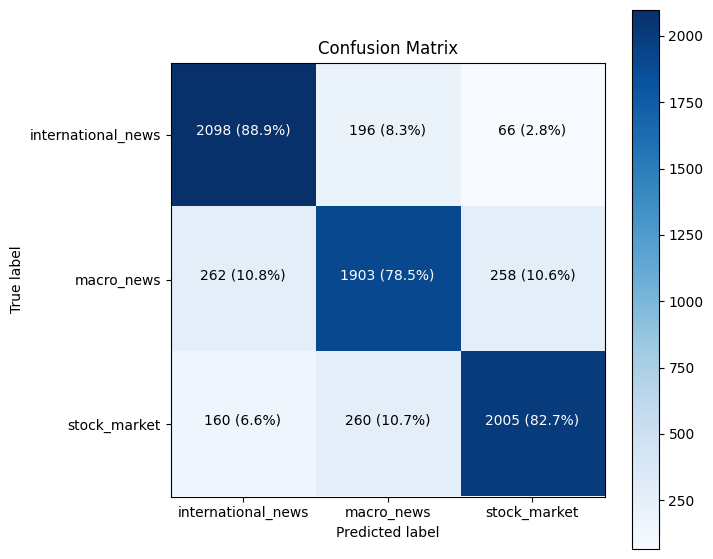

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2360
           1       0.81      0.79      0.80      2423
           2       0.86      0.83      0.84      2425

    accuracy                           0.83      7208
   macro avg       0.83      0.83      0.83      7208
weighted avg       0.83      0.83      0.83      7208

Model saved in:  outputs/models/MultiNB_20230517_224145.pkl


In [208]:
from sklearn.naive_bayes import MultinomialNB

multiNB_model = MLClassifier(MultinomialNB(), model_name = 'MultiNB').build_model()
multiNB_model.make_confusion_matrix()
multiNB_evaluation = multiNB_model.get_performance()
multiNB_model.save_model()

## Logistic Regression

Test accuracy:  0.8996947835738068


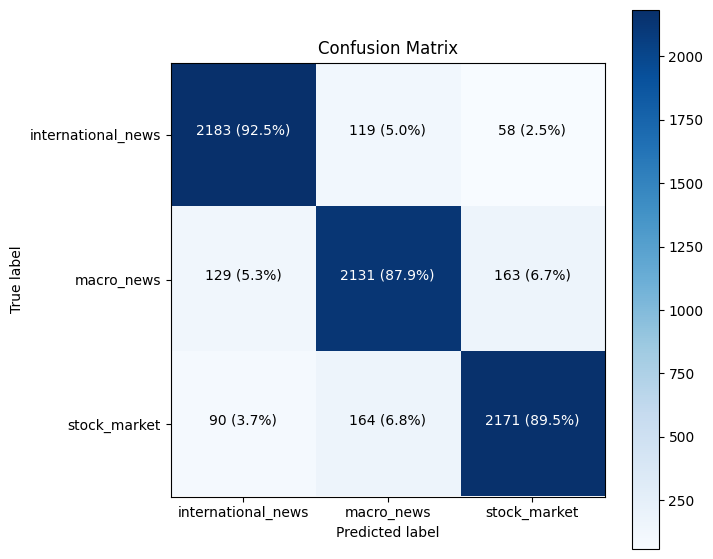

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2360
           1       0.88      0.88      0.88      2423
           2       0.91      0.90      0.90      2425

    accuracy                           0.90      7208
   macro avg       0.90      0.90      0.90      7208
weighted avg       0.90      0.90      0.90      7208

Model saved in:  outputs/models/LogisticRegression_20230518_174753.pkl


In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
LR_model = MLClassifier(clf, model_name = 'LogisticRegression').build_model()
LR_model.make_confusion_matrix()
LR_evaluation = LR_model.get_performance()
LR_model.save_model()

## Support Vector Machine

Test accuracy:  0.9085738068812431


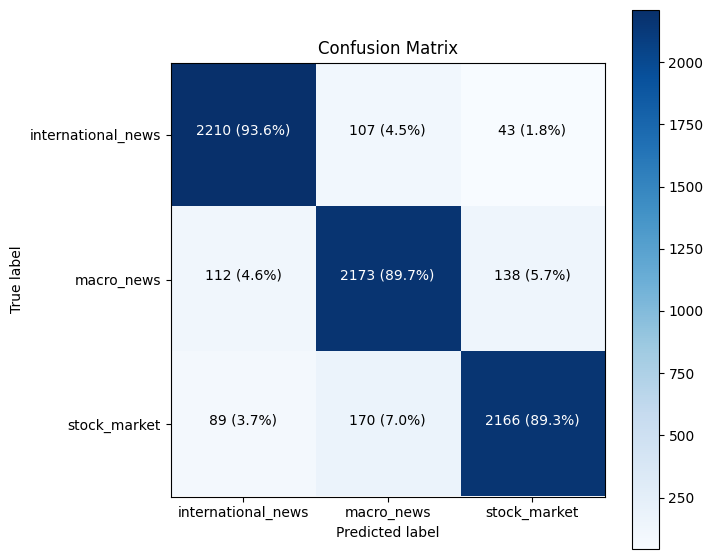

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2360
           1       0.89      0.90      0.89      2423
           2       0.92      0.89      0.91      2425

    accuracy                           0.91      7208
   macro avg       0.91      0.91      0.91      7208
weighted avg       0.91      0.91      0.91      7208

Model saved in:  outputs/models/SVC_20230517_231711.pkl


In [210]:
from sklearn.svm import SVC

SVC_model = MLClassifier(SVC(probability= True), model_name = 'SVC').build_model()
SVC_model.make_confusion_matrix()
SVC_evaluation = SVC_model.get_performance()
SVC_model.save_model()

## RandomForest Classification

Test accuracy:  0.8025804661487237


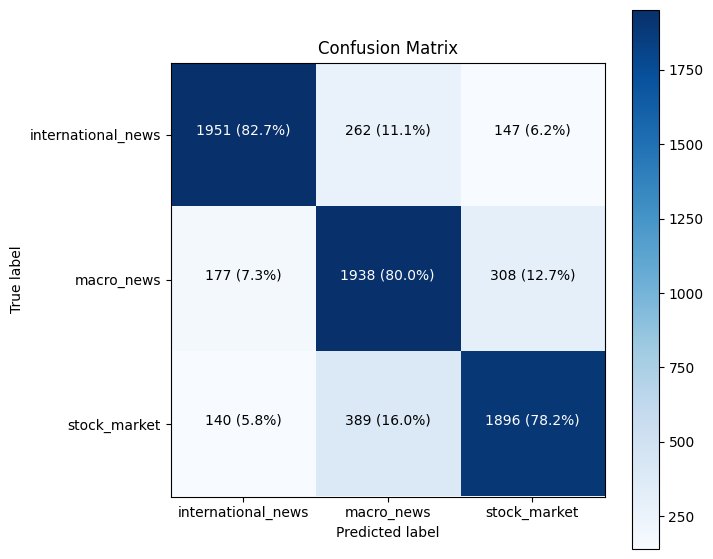

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2360
           1       0.75      0.80      0.77      2423
           2       0.81      0.78      0.79      2425

    accuracy                           0.80      7208
   macro avg       0.81      0.80      0.80      7208
weighted avg       0.80      0.80      0.80      7208

Model saved in:  outputs/models/RFC_20230517_232317.pkl


In [223]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'clf__n_estimators': [300, 500],
    'clf__max_depth' : [3,5]
}

RFC_model = MLClassifier(RandomForestClassifier(), params, model_name = 'RFC').build_model()
RFC_model.make_confusion_matrix()
RFC_evaluation = RFC_model.get_performance()
RFC_model.save_model()

## Neural Network Embeddings

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

226/226 [==============================] - 1s 2ms/step
Test accuracy:  [0.31291088461875916, 0.8888735175132751]


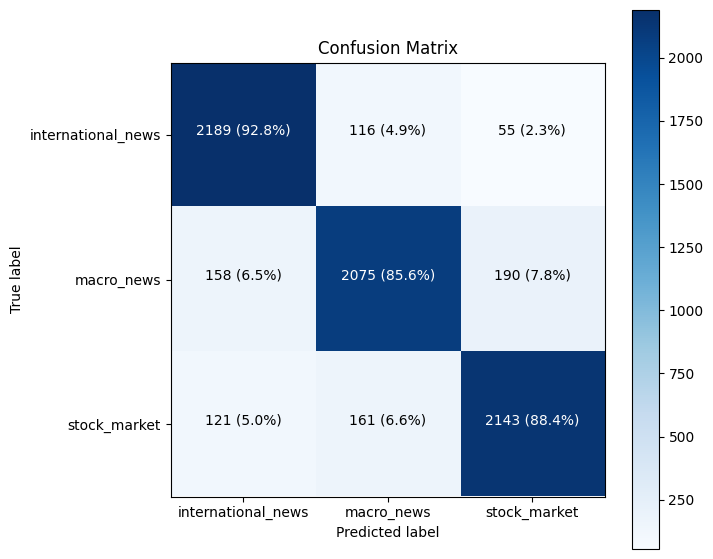

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2360
           1       0.88      0.86      0.87      2423
           2       0.90      0.88      0.89      2425

    accuracy                           0.89      7208
   macro avg       0.89      0.89      0.89      7208
weighted avg       0.89      0.89      0.89      7208

INFO:tensorflow:Assets written to: outputs/models/DL_20230518_165448/assets
Model saved in:  outputs/models/DL_20230518_165448


In [19]:
dl_model = DLClassifier(is_neuralnet = True).build_model(epochs = 5)
dl_model.make_confusion_matrix()
dl_evaluation = dl_model.get_performance()
dl_model.save_model()

# Ensemble model

In [21]:
from helper.modeling import Ensemble, DataGenerator
from helper.cfg import Config

CFG = Config(r"configs/cfg.yaml").read(0)

test = DataGenerator.read_file_in_ML('datasets/preprocessed/test.txt')
models = Ensemble(CFG)
models.load_testset(*test)

Metal device set to: Apple M1 Pro


2023-05-19 14:44:02.008440: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [91]:
models.get_performance()

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2360
           1       0.89      0.88      0.89      2423
           2       0.91      0.90      0.90      2425

    accuracy                           0.90      7208
   macro avg       0.90      0.90      0.90      7208
weighted avg       0.90      0.90      0.90      7208



,metric,international_news,macro_news,stock_market,model_name
0,precision,0.908678,0.890046,0.910767,ensemble
1,recall,0.931780,0.881965,0.896495,ensemble
2,fscore,0.920084,0.885987,0.903574,ensemble
3,accuracy,0.903163,0.903163,0.903163,ensemble


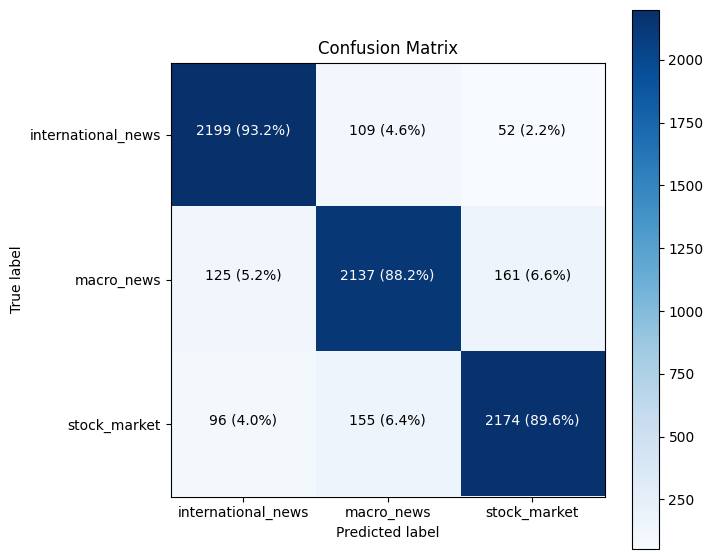

In [22]:
fig = models.make_confusion_matrix()

## Kiểm tra những dự đoán sai nhất

In [24]:
wrong = models.find_wrong()

In [29]:
data['raw_text'] = data['text'].copy()
data['text'] = data['text'].map(models.preprocessor.transform)
wrong_merge = wrong.merge(data)

In [31]:
wrong_merge = wrong_merge.drop(['text','category'],axis = 1).rename(columns = {
    "raw_text":'text',
    "y_true": "label thực tế",
    "y_pred": "label dự đoán",
    "pred_conf": "xác suất dự đoán",
})

In [36]:
wrong_merge.to_excel("outputs/results/wrong_prediction_v1.0.xlsx", index = False)